## Convolutional Neural Network

### Mount Drive

In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

### Importing Packages

In [2]:
# Fetching Dataset
import pandas as pd

# Reading Images
import numpy as np
import cv2 as cv

# Scaling Features
# from sklearn.preprocessing import MinMaxScaler

# Spliting Train & Test Set
from sklearn.model_selection import train_test_split
# from fast_ml.model_development import train_valid_test_split

# Binarizing Output
from sklearn.preprocessing import LabelBinarizer

# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating Model
import tensorflow as tf
from tensorflow.keras import layers,models

# Training and Evaluating the Model
from sklearn.metrics import (classification_report, multilabel_confusion_matrix, confusion_matrix)
import seaborn as sb
import matplotlib.pyplot as plt

# Making Predictions

# BD_DB_64


### Fetching Dataset

In [3]:
# dataset_dir = "/content/drive/MyDrive/Dataset/Dataset_Thesis/"
dataset_dir = "/kaggle/input/dataset-thesis/"
dataset = pd.read_csv(dataset_dir + "merged/merged.csv")

In [4]:
dataset

,Filename,District
0,0_16_1_0018_ (222).png,Bagerhat
1,0_14_1_0010_ (45).png,Bagerhat
2,0_14_1_0009_ (45).png,Bagerhat
3,0_16_1_0018_ (221).png,Bagerhat
4,0_16_1_0018_ (225).png,Bagerhat
...,...,...
11515,Thakurgaon_5 (2).jpg,Thakurgaon
11516,Thakurgaon_61.jpg,Thakurgaon
11517,Thakurgaon_19 (2).jpg,Thakurgaon
11518,Thakurgaon_60.jpg,Thakurgaon


In [5]:
X = dataset.iloc[:,0]
y = dataset.iloc[:,1]
print(X.shape)
print(y.shape)

(11520,)
(11520,)


### Reading Images

In [6]:
new_weight = 240
new_height = 80
x_data = np.empty((len(X), new_height, new_weight), dtype=np.int64)
x_data.shape

(11520, 80, 240)

In [7]:
# for i, img_path in enumerate(X):
#   # Reading Image
#   candidate_image = cv.imread(dataset_dir + "merged/raw/" + y[i] + "/" + img_path)
#   # Resizing Image
#   candidate_rs = cv.resize(candidate_image, dsize=(new_weight, new_height))
#   # Converting Image to Grayscale
#   candidate_gray = cv.cvtColor(candidate_rs, cv.COLOR_BGR2GRAY)
#   # Computing a Global Threshold Value from Grayscale Image(Using Otsu's Method) & Converting to Binary Image
#   ret, candidate_bw = cv.threshold(candidate_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
#   # ret, candidate_bw = cv.threshold(candidate_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
  
#   # print(img_path, end =" ")
#   x_data[i] = candidate_bw

In [8]:
for i, img_path in enumerate(X):
    candidate_image = cv.imread(dataset_dir + "merged/converted_80_240/" + y[i] + "/" + img_path, cv.IMREAD_UNCHANGED)
    # candidate_rs = cv.resize(candidate_image, dsize=(new_weight, new_height))
    x_data[i] = candidate_image

In [9]:
# plt.imshow(x_data[1], cmap="gray")
# len(x_data[0][0])

In [10]:
X = np.reshape(x_data,(X.shape[0],new_height*new_weight))
X.shape

(11520, 19200)

### Scaling Features

In [11]:
# sc = MinMaxScaler()
# X = sc.fit_transform(X)

In [12]:
# X

### Spliting Train & Test Set


In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45, stratify=dataset["District"])
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.75, random_state=45, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.60, stratify=y_rem)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(8640, 19200) (1728, 19200) (1152, 19200) (8640,) (1728,) (1152,)


In [14]:
# print(
#     f'NUMBER OF TARGET IN THE ORIGINAL DATA\n{dataset["District"].value_counts()}\n\n'
#     + f"NUMBER OF TARGET IN THE TRAINING SET\n{y_train.value_counts()}\n\n"
#     + f"NUMBER OF TARGET IN THE TEST SET\n{y_test.value_counts()}\n\n"
#     + f"NUMBER OF TARGET IN THE VALIDATION SET\n{y_val.value_counts()}"
# )

In [15]:
# print(
#     f'RATIO OF TARGET IN THE ORIGINAL DATA\n{dataset["District"].value_counts() / len(dataset)}\n\n'
#     + f"RATIO OF TARGET IN THE TRAINING SET\n{y_train.value_counts() / len(y_train)}\n\n"
#     + f"RATIO OF TARGET IN THE TEST SET\n{y_test.value_counts() / len(y_test)}\n\n"
#     + f"RATIO OF TARGET IN THE VALIDATION SET\n{y_val.value_counts() / len(y_val)}"
# )

In [16]:
X_train = X_train.reshape(-1,new_height,new_weight,1)
X_test = X_test.reshape(-1,new_height,new_weight,1)
X_val = X_val.reshape(-1,new_height,new_weight,1)
print(X_train.shape, X_test.shape, X_val.shape)

(8640, 80, 240, 1) (1728, 80, 240, 1) (1152, 80, 240, 1)


### Binarizing Output

In [17]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_val = lb.fit_transform(y_val)
print(y_train.shape, y_test.shape, y_val.shape)

(8640, 64) (1728, 64) (1152, 64)


In [18]:
print(y_train)
print(y_test)
print(y_val)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
print(y_train.shape)
print(y_test.shape)

(8640, 64)
(1728, 64)


### Image Augmentation

In [20]:
# Define ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=8,
    zoom_range=0.1,
    shear_range=0.5,
    cval=0.0,
    fill_mode='constant')

In [21]:
# Generate augmented data
batch_size = 32
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=False)

In [22]:
len(train_generator)

270

### Creating Model


In [23]:
import datetime
from tensorflow.keras.callbacks import TensorBoard
log_dir = "logs/cnn_50/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [24]:
num_classes = dataset.District.nunique()
input_shape = (new_height, new_weight, 1)
# input_shape = X.shape

In [25]:
# Set hyperparameters
dropout_rate = 0.5

In [26]:
cnn_model = models.Sequential(name='CNN_AAA')
# cnn_model.add(layers.Input(shape=input_shape, name='Input'))
cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, name='Conv2D_1'))
cnn_model.add(layers.AveragePooling2D((2, 2), name='AveragePooling2d_1'))
cnn_model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name='Conv2D_2'))
cnn_model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2d_1'))
cnn_model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='Conv2D_3'))
cnn_model.add(layers.AveragePooling2D((2, 2), name='AveragePooling2d_2'))
cnn_model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', name='Conv2D_4'))
cnn_model.add(layers.MaxPooling2D((2, 2), name='MaxPooling2d_2'))
cnn_model.add(layers.Flatten(name='Flatten_1'))
cnn_model.add(layers.Dropout(rate=dropout_rate, name='Dropout_1'))
cnn_model.add(layers.Dense(units=num_classes, activation='softmax', name='Output'))

In [27]:
cnn_model.summary()

Model: "CNN_AAA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 78, 238, 64)       640       
                                                                 
 AveragePooling2d_1 (Average  (None, 39, 119, 64)      0         
 Pooling2D)                                                      
                                                                 
 Conv2D_2 (Conv2D)           (None, 37, 117, 128)      73856     
                                                                 
 MaxPooling2d_1 (MaxPooling2  (None, 18, 58, 128)      0         
 D)                                                              
                                                                 
 Conv2D_3 (Conv2D)           (None, 16, 56, 256)       295168    
                                                                 
 AveragePooling2d_2 (Average  (None, 8, 28, 256)       0   

In [28]:
# !pip install visualkeras
# import visualkeras

In [29]:
# visualkeras.layered_view(cnn_model, legend=True, draw_volume=False)

In [30]:
# from tensorflow.keras.utils import plot_model
# plot_model(vit_model, to_file='cnn_model.png', show_shapes=True, show_layer_activations=True)

### Training & Evaluating the Model


In [31]:
epochs = 50
k = 5

In [32]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','top_k_categorical_accuracy'])

In [33]:
history  = cnn_model.fit(train_generator, validation_data=(X_val, y_val), epochs=epochs, callbacks=[tensorboard_callback])

Epoch 1/50
270/270 [==============================] - 24s 60ms/step - loss: 3.7370 - accuracy: 0.2184 - top_k_categorical_accuracy: 0.4508 - val_loss: 1.2524 - val_accuracy: 0.6502 - val_top_k_categorical_accuracy: 0.8967
Epoch 2/50
270/270 [==============================] - 22s 81ms/step - loss: 1.3279 - accuracy: 0.6426 - top_k_categorical_accuracy: 0.8786 - val_loss: 0.4175 - val_accuracy: 0.8767 - val_top_k_categorical_accuracy: 0.9826
Epoch 3/50
270/270 [==============================] - 15s 56ms/step - loss: 0.7738 - accuracy: 0.7870 - top_k_categorical_accuracy: 0.9469 - val_loss: 0.2385 - val_accuracy: 0.9314 - val_top_k_categorical_accuracy: 0.9931
Epoch 4/50
270/270 [==============================] - 16s 57ms/step - loss: 0.5352 - accuracy: 0.8498 - top_k_categorical_accuracy: 0.9681 - val_loss: 0.1538 - val_accuracy: 0.9618 - val_top_k_categorical_accuracy: 0.9948
Epoch 5/50
270/270 [==============================] - 15s 54ms/step - loss: 0.4042 - accuracy: 0.8801 - top_k_ca

In [34]:
history_test = cnn_model.evaluate(X_test, y_test, callbacks=[tensorboard_callback])

54/54 [==============================] - 1s 10ms/step - loss: 0.0875 - accuracy: 0.9861 - top_k_categorical_accuracy: 0.9942


In [35]:
y_predicted = cnn_model.predict(X_test)

54/54 [==============================] - 1s 8ms/step


In [36]:
y_test_label = lb.inverse_transform(y_test)
y_predicted_label = lb.inverse_transform(y_predicted)

In [37]:
print("Classification Report:")
clr = classification_report(y_test_label, y_predicted_label)
print(clr)

Classification Report:
              precision    recall  f1-score   support

    Bagerhat       0.96      1.00      0.98        27
   Bandarban       1.00      1.00      1.00        27
     Barguna       1.00      1.00      1.00        27
    Barishal       1.00      1.00      1.00        27
       Bhola       0.96      0.96      0.96        27
      Bogura       0.93      0.96      0.95        27
Brahmanbaria       1.00      1.00      1.00        27
    Chandpur       0.96      1.00      0.98        27
  Chittagong       1.00      1.00      1.00        27
   Chuadanga       1.00      1.00      1.00        27
   CoxsBazar       1.00      0.96      0.98        27
     Cumilla       1.00      1.00      1.00        27
       Dhaka       1.00      1.00      1.00        27
    Dinajpur       0.96      1.00      0.98        27
    Faridpur       1.00      1.00      1.00        27
        Feni       1.00      1.00      1.00        27
   Gaibandha       1.00      0.96      0.98        27
    

In [38]:
print("Confusion Matrix:")
multilabel_cm = multilabel_confusion_matrix(y_test_label, y_predicted_label)
cm = confusion_matrix(y_test_label, y_predicted_label)
print(cm)

Confusion Matrix:
[[27  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 27]]


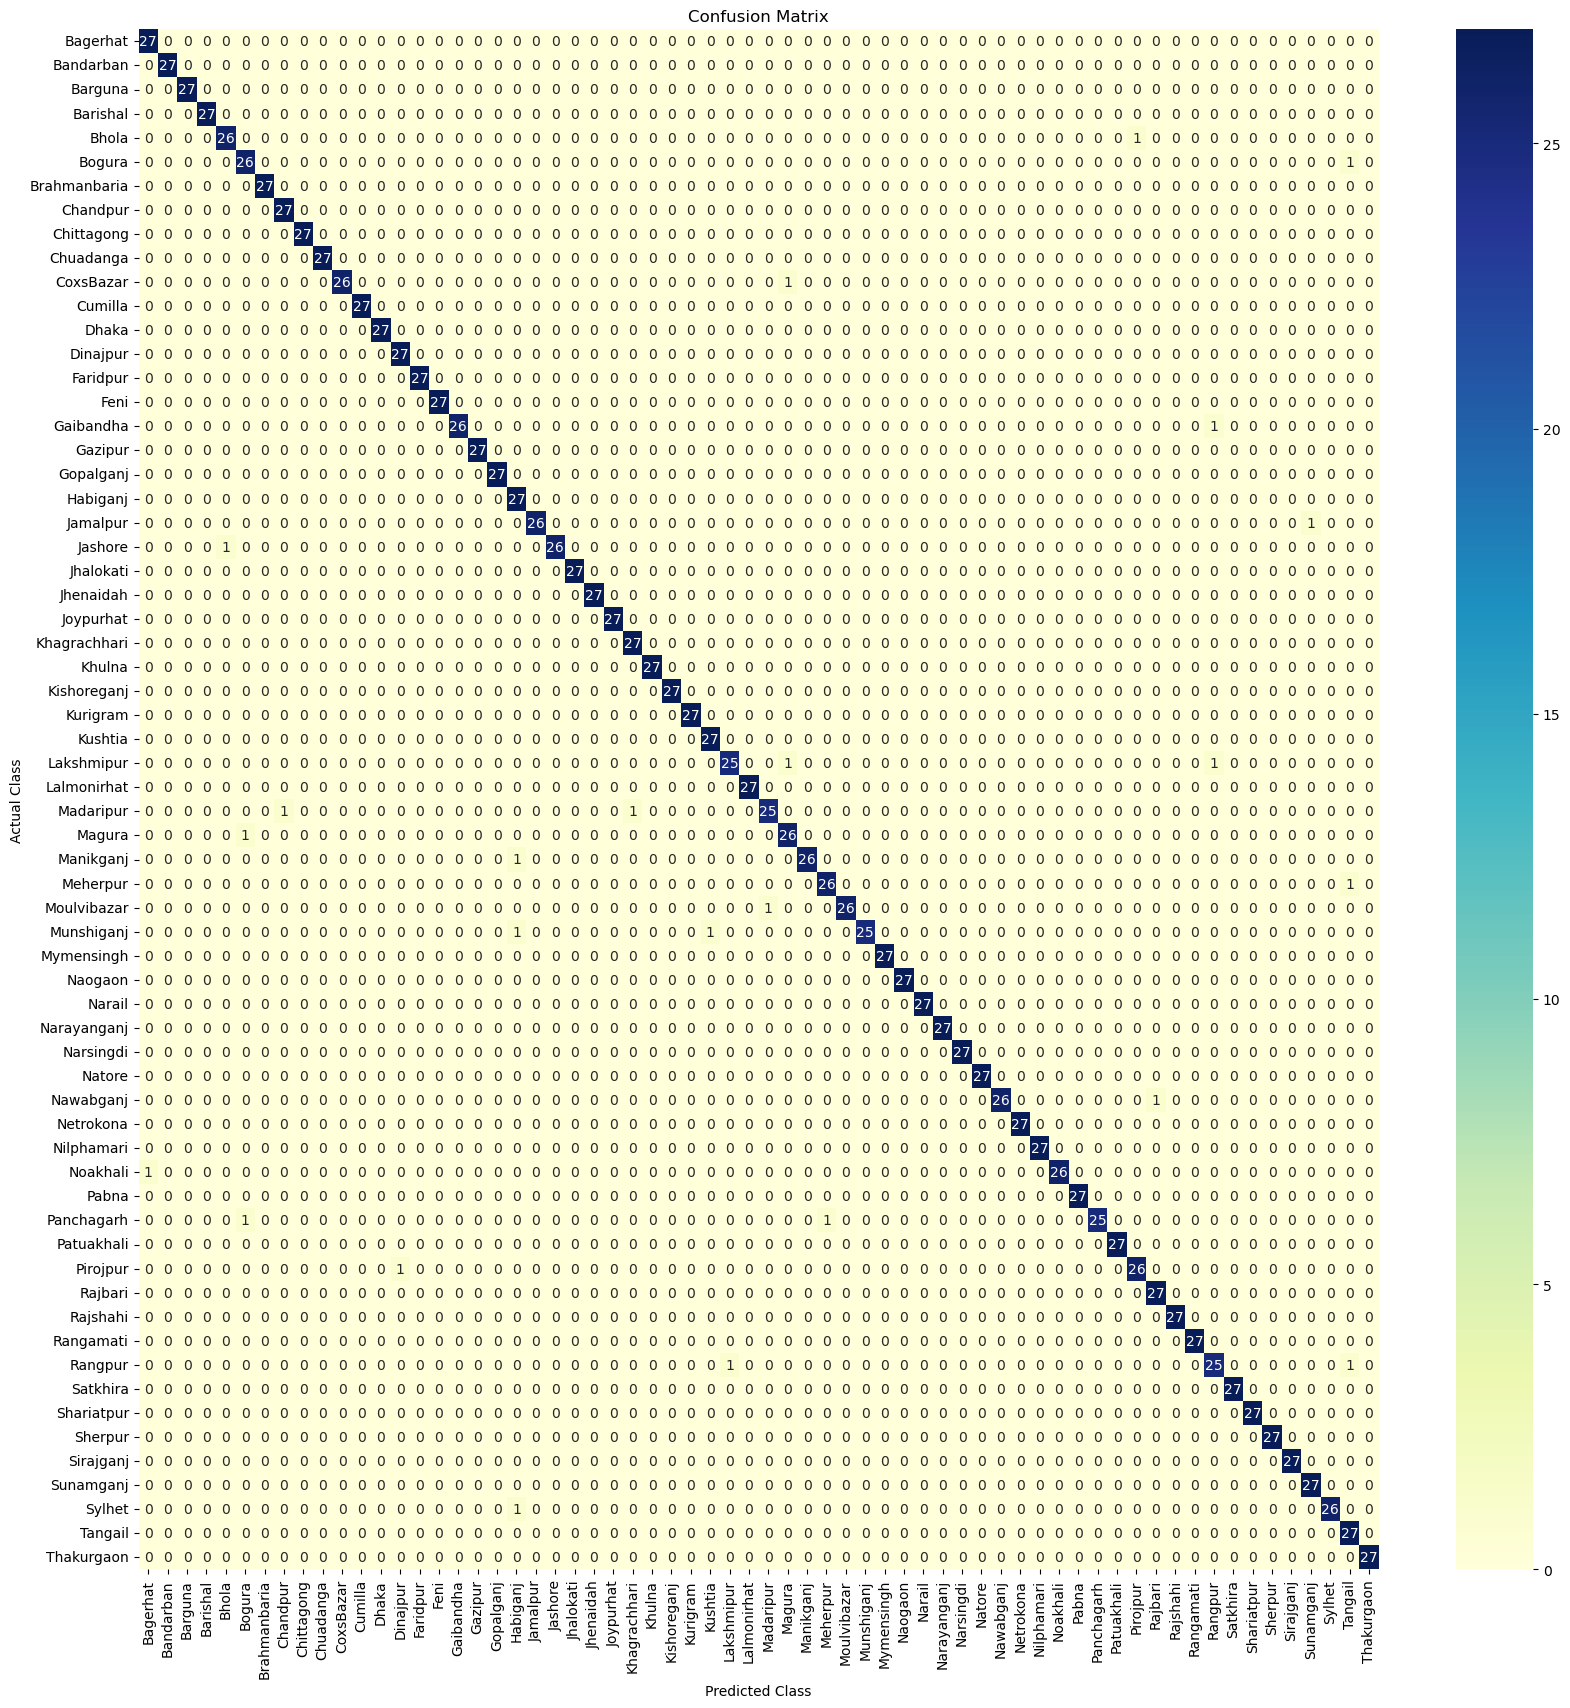

In [39]:
cm_df = pd.DataFrame(cm, index = dataset.District.unique(), columns = dataset.District.unique())
plt.figure(figsize=(20,20))
cm_plot = sb.heatmap(cm_df, cmap="YlGnBu", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show(cm_plot)

In [40]:
!zip -r logs.zip logs/

  adding: logs/ (stored 0%)
  adding: logs/cnn_50/ (stored 0%)
  adding: logs/cnn_50/20230528-195516/ (stored 0%)
  adding: logs/cnn_50/20230528-195516/train/ (stored 0%)
  adding: logs/cnn_50/20230528-195516/train/events.out.tfevents.1685304520.b501b0fe3bd2.23.2.v2 (deflated 83%)
  adding: logs/cnn_50/20230528-195516/train/events.out.tfevents.1685303719.b501b0fe3bd2.23.0.v2 (deflated 68%)
  adding: logs/cnn_50/20230528-195516/validation/ (stored 0%)
  adding: logs/cnn_50/20230528-195516/validation/events.out.tfevents.1685303742.b501b0fe3bd2.23.1.v2 (deflated 81%)
  adding: logs/cnn_50/20230528-195516/validation/events.out.tfevents.1685304520.b501b0fe3bd2.23.3.v2 (deflated 38%)


## Making Predictions


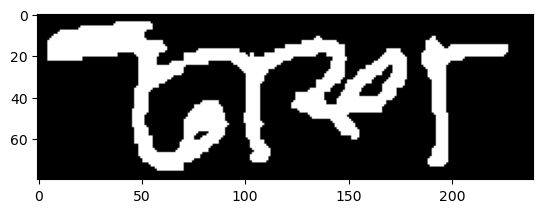

In [41]:
test = 157
top = 5
plt.imshow(X_test[test],cmap = "gray")

In [42]:
# print(y_predicted[test])
y_predicted_labels = y_predicted[test].argsort()[-top:][::-1]
y_predicted_labels_accuracy = y_predicted[test][y_predicted_labels]
print(y_predicted_labels, y_predicted_labels_accuracy)

[12 58  7 23 21] [1.00000000e+00 1.54715796e-09 4.68071082e-10 1.15681506e-10
 3.99755611e-11]


In [43]:
print("Top K=>")
for i in range(top):
    print("Label: ", lb.classes_[y_predicted_labels[i]], ", Accuracy: ", y_predicted_labels_accuracy[i]*100)
print("Predicted=>")
y_predicted_labels = np.argmax(y_predicted[test])
print(lb.classes_[y_predicted_labels], end =" ")

Top K=>
Label:  Dhaka , Accuracy:  100.0
Label:  Sherpur , Accuracy:  1.5471579573045346e-07
Label:  Chandpur , Accuracy:  4.680710818938394e-08
Label:  Jhenaidah , Accuracy:  1.1568150604102101e-08
Label:  Jashore , Accuracy:  3.997556105583833e-09
Predicted=>
Dhaka 

## BD_DB_64

In [44]:
dataset_new = pd.read_csv(dataset_dir + "BD_DB_64/BD_DB_64.csv")
X_new = dataset_new.iloc[:,0]
y_new = dataset_new.iloc[:,1]
x_data_new = np.empty((len(X_new), new_height, new_weight), dtype=np.int64)

In [45]:
for i, img_path in enumerate(X_new):
    candidate_image_new = cv.imread(dataset_dir + "BD_DB_64/converted_80_240/" + y_new[i] + "/" + img_path, cv.IMREAD_UNCHANGED)
    # candidate_rs = cv.resize(candidate_image, dsize=(new_weight, new_height))
    x_data_new[i] = candidate_image_new
X_new = np.reshape(x_data_new,(X_new.shape[0],new_height*new_weight))
X_new = X_new.reshape(-1,new_height,new_weight,1)
y_new = lb.fit_transform(y_new)

In [46]:
history_test = cnn_model.evaluate(X_new, y_new)

52/52 [==============================] - 1s 14ms/step - loss: 0.0640 - accuracy: 0.9832 - top_k_categorical_accuracy: 1.0000
